In [1]:
import pandas as pd

In [2]:
uri_filmes = 'movies.csv'
#uri_filmes = 'https://raw.githubusercontent.com/oyurimatheus/clusterirng/master/movies/movies.csv'

filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
generos = filmes.generos.str.get_dummies()

In [4]:
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

generos_escalados = scaler.fit_transform(generos)

#generos_escalados[:5]

In [6]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [0 0 1 ... 2 0 1]


In [10]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.75281401  1.71470934  1.29983737  1.19579447 -0.15159815
  -0.26448275 -0.2107874  -0.58536363  0.97518254 -0.08752863 -0.24142967
   0.58780036  0.14430857 -0.14055173 -0.28845754  0.60717533 -0.18705283
  -0.05860895 -0.02484091]
 [-0.05917995 -0.29073568 -0.28605025 -0.20457534 -0.13971865  1.22983291
  -0.1304122  -0.16019806 -0.31742163 -0.14972122 -0.09168295 -0.17975655
  -0.12356685  0.07312332 -0.19164006  0.28928634 -0.22895774 -0.4187991
  -0.11557623 -0.04980706]
 [ 0.05550695 -0.02561412 -0.3036333  -0.23816756 -0.25071791 -0.75861264
   0.16064311  0.16471668  0.37431383 -0.18113212  0.08480513  0.18622964
  -0.08745116 -0.08893369  0.16514202 -0.10618006 -0.02426645  0.32656025
  

In [8]:
from sklearn.datasets import make_blobs

dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)

dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
dados.head()

,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


In [11]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.752814,1.714709,1.299837,1.195794,-0.151598,-0.264483,-0.210787,-0.585364,0.975183,-0.087529,-0.241430,0.587800,0.144309,-0.140552,-0.288458,0.607175,-0.187053,-0.058609,-0.024841
1,-0.059180,-0.290736,-0.286050,-0.204575,-0.139719,1.229833,-0.130412,-0.160198,-0.317422,-0.149721,-0.091683,-0.179757,-0.123567,0.073123,-0.191640,0.289286,-0.228958,-0.418799,-0.115576,-0.049807
2,0.055507,-0.025614,-0.303633,-0.238168,-0.250718,-0.758613,0.160643,0.164717,0.374314,-0.181132,0.084805,0.186230,-0.087451,-0.088934,0.165142,-0.106180,-0.024266,0.326560,0.092119,0.039579


array([<matplotlib.axes._subplots.AxesSubplot object at 0xa2086aac>,
      dtype=object)

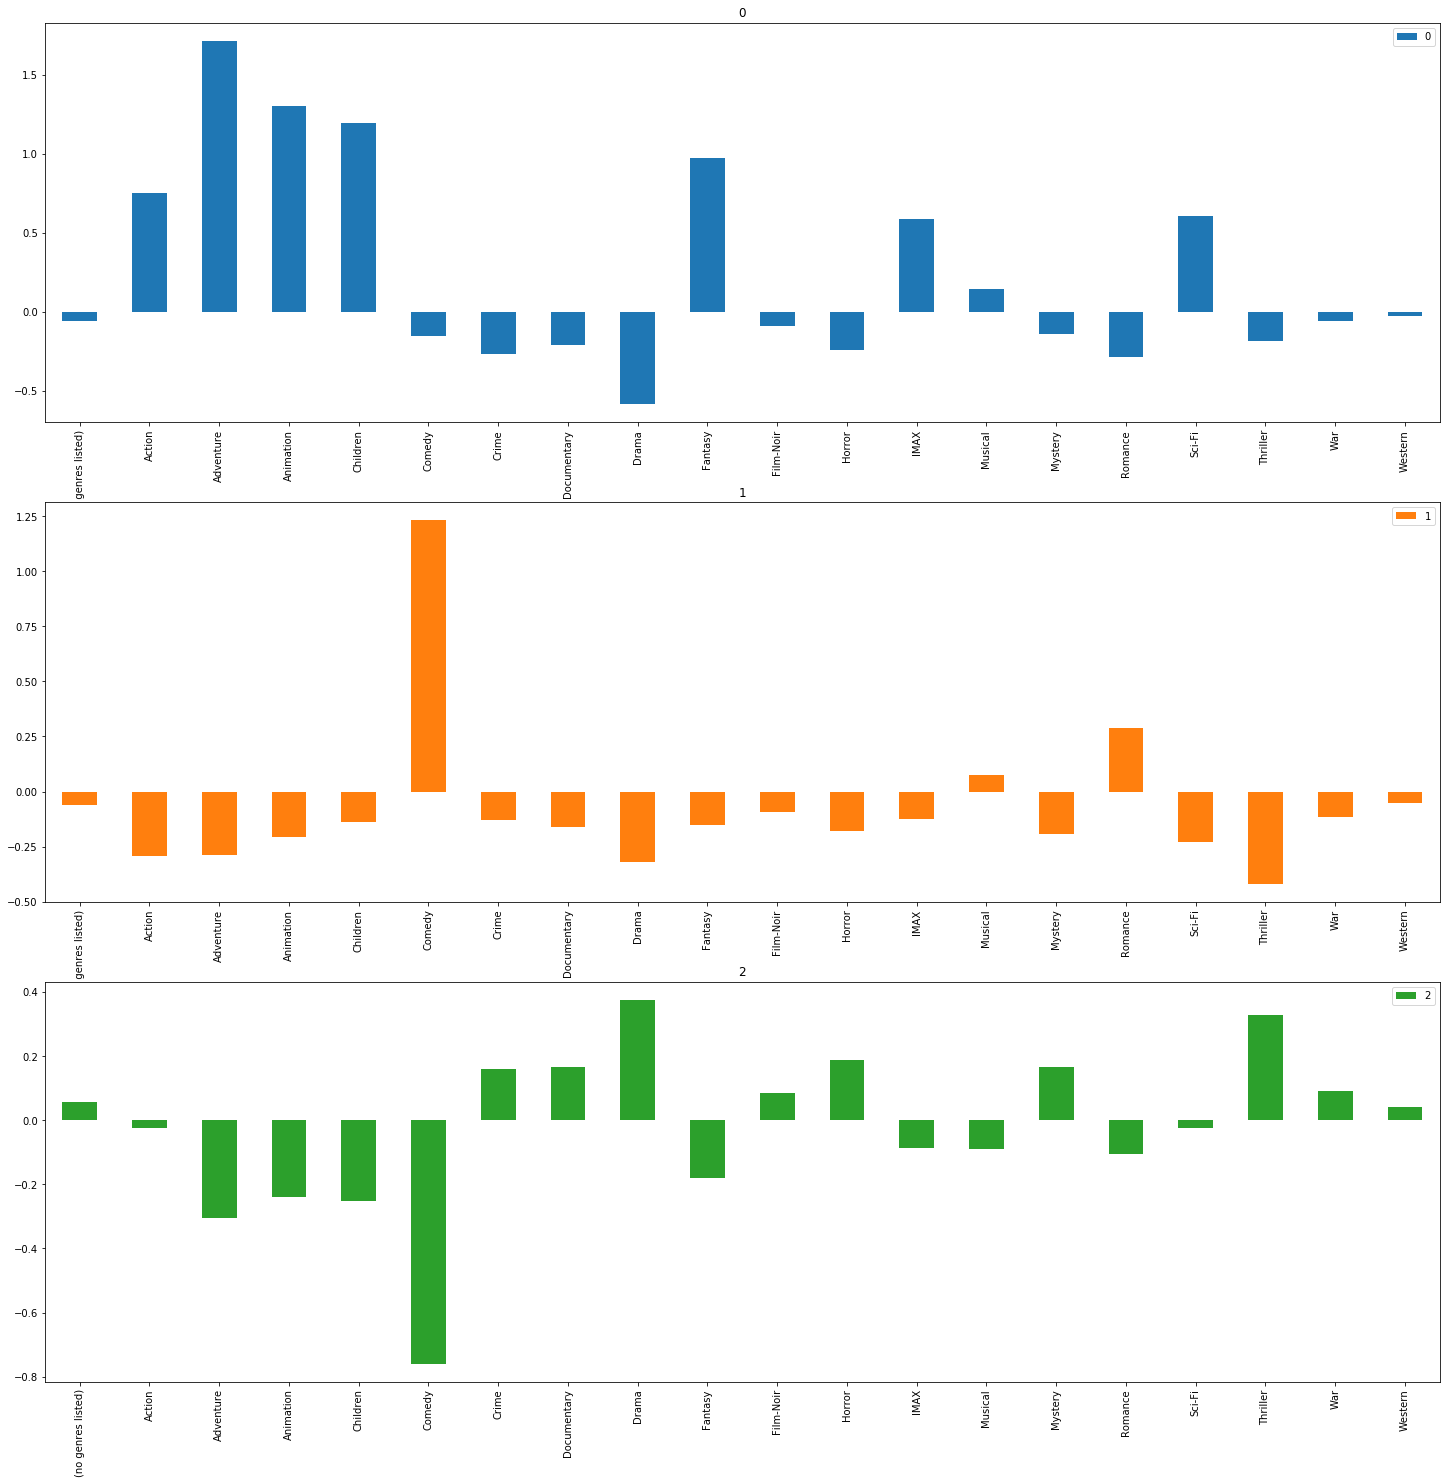

In [12]:
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 25),
               sharex=False)

In [13]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9145,147372,Doctor Who: Last Christmas (2014),Adventure|Drama|Fantasy|Sci-Fi,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1972,2617,"Mummy, The (1999)",Action|Adventure|Comedy|Fantasy|Horror|Thriller,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
8929,136020,Spectre (2015),Action|Adventure|Crime,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6760,59784,Kung Fu Panda (2008),Action|Animation|Children|Comedy|IMAX,0,1,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5646,27441,Blood: The Last Vampire (2000),Action|Animation|Horror,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8297,106491,47 Ronin (2013),Action|Adventure|Fantasy,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6505,53464,Fantastic Four: Rise of the Silver Surfer (2007),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3574,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6157,44225,Aquamarine (2006),Children|Comedy|Fantasy,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.manifold import TSNE

tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 59.493706 ,  31.545595 ],
       [ 36.84027  ,  22.72852  ],
       [-32.17579  , -20.152807 ],
       ...,
       [  1.7144768, -25.392849 ],
       [  0.8838038,  65.68287  ],
       [  2.6410491,  10.784397 ]], dtype=float32)

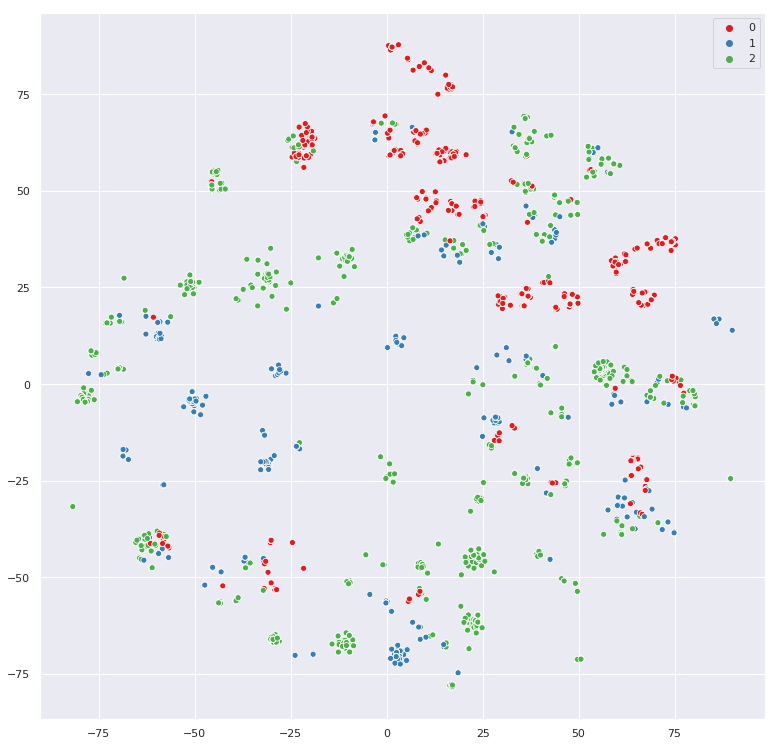

In [15]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})

sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0xa14ee82c>,
      dtype=object)

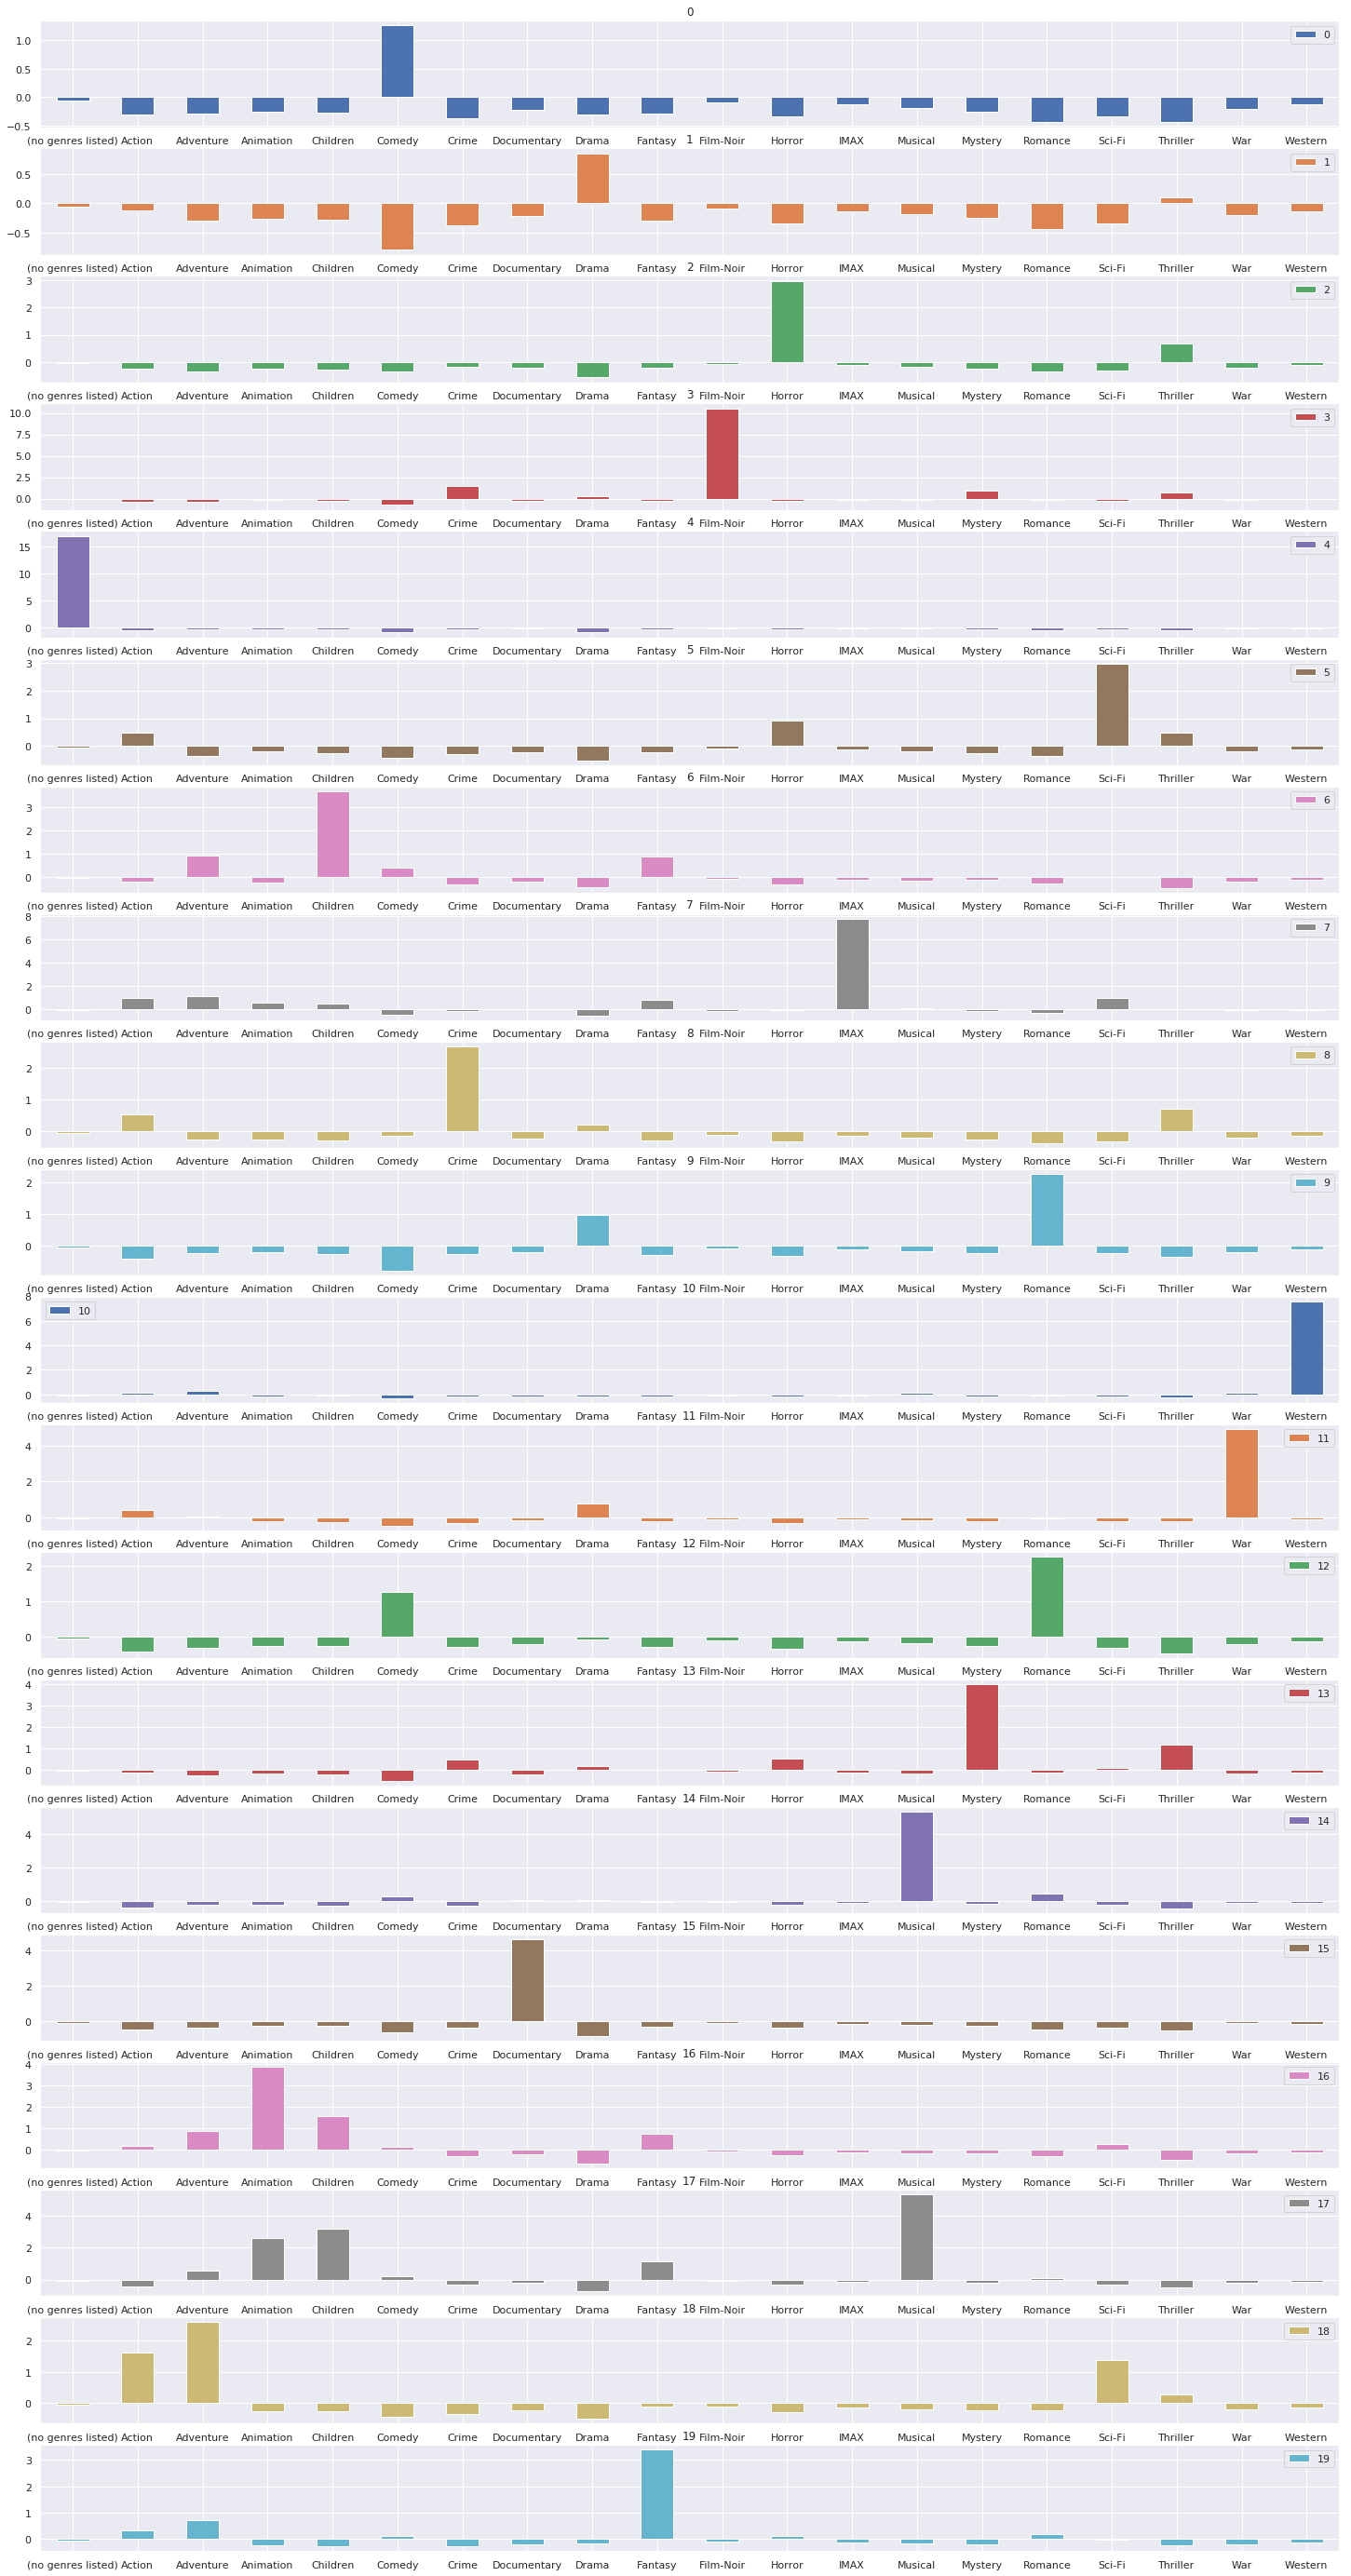

In [16]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [17]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [18]:
kmeans(20, generos_escalados)

[20, 56511.6359612023]

In [19]:
kmeans(3, generos_escalados)

[3, 166292.38247181987]

In [20]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.00000000003],
 [2, 179528.1692770761],
 [3, 166284.16187814216],
 [4, 155974.50914330114],
 [5, 146593.73767364127],
 [6, 138054.65130876747],
 [7, 129175.50819835019],
 [8, 119152.44884921999],
 [9, 109558.71156654933],
 [10, 101663.68248492663],
 [11, 93335.5397207731],
 [12, 86997.42329429805],
 [13, 81381.45196476295],
 [14, 74906.04466140966],
 [15, 69527.60037985686],
 [16, 63516.783985954935],
 [17, 60396.7261511272],
 [18, 58203.56433732076],
 [19, 56265.468345911744],
 [20, 54965.677909344384],
 [21, 53109.10464443558],
 [22, 52370.793780658765],
 [23, 50831.55596493594],
 [24, 49157.065969390365],
 [25, 48120.672420562594],
 [26, 46568.491495204566],
 [27, 46243.75200998651],
 [28, 44593.560485281036],
 [29, 44051.41310856458],
 [30, 43121.70362550194],
 [31, 41381.456531717595],
 [32, 41054.87309216065],
 [33, 39952.07164722256],
 [34, 39685.53812953291],
 [35, 38552.52017560197],
 [36, 38130.74529316983],
 [37, 37442.02836786225],
 [38, 36978.54847392363],
 [39,

In [21]:
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179528.169277
2,3,166284.161878
3,4,155974.509143
4,5,146593.737674
5,6,138054.651309
6,7,129175.508198
7,8,119152.448849
8,9,109558.711567
9,10,101663.682485


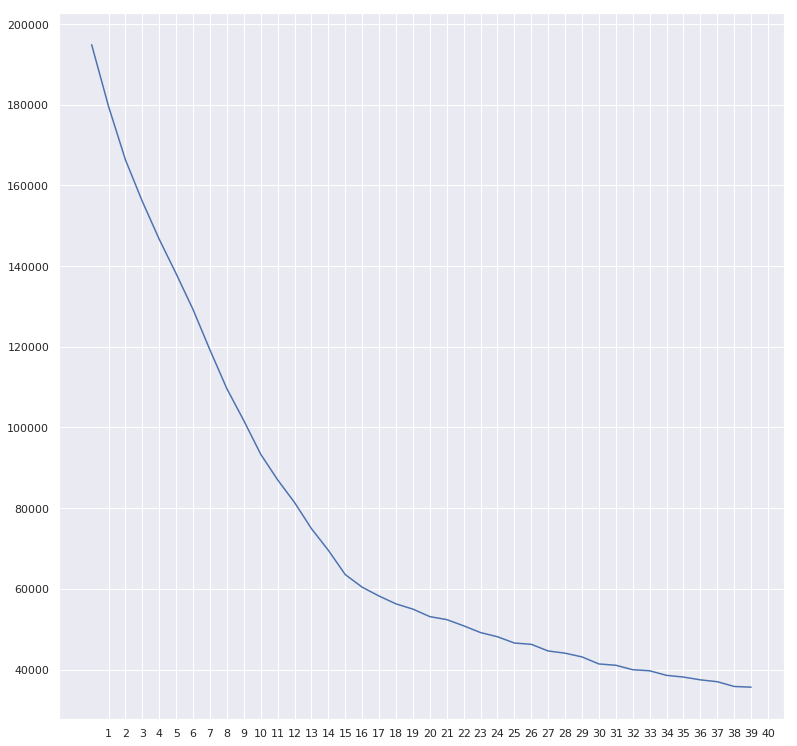

In [22]:
resultado.inertia.plot(xticks=resultado.grupos)

In [23]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x9f12db2c>,
      dtype=object)

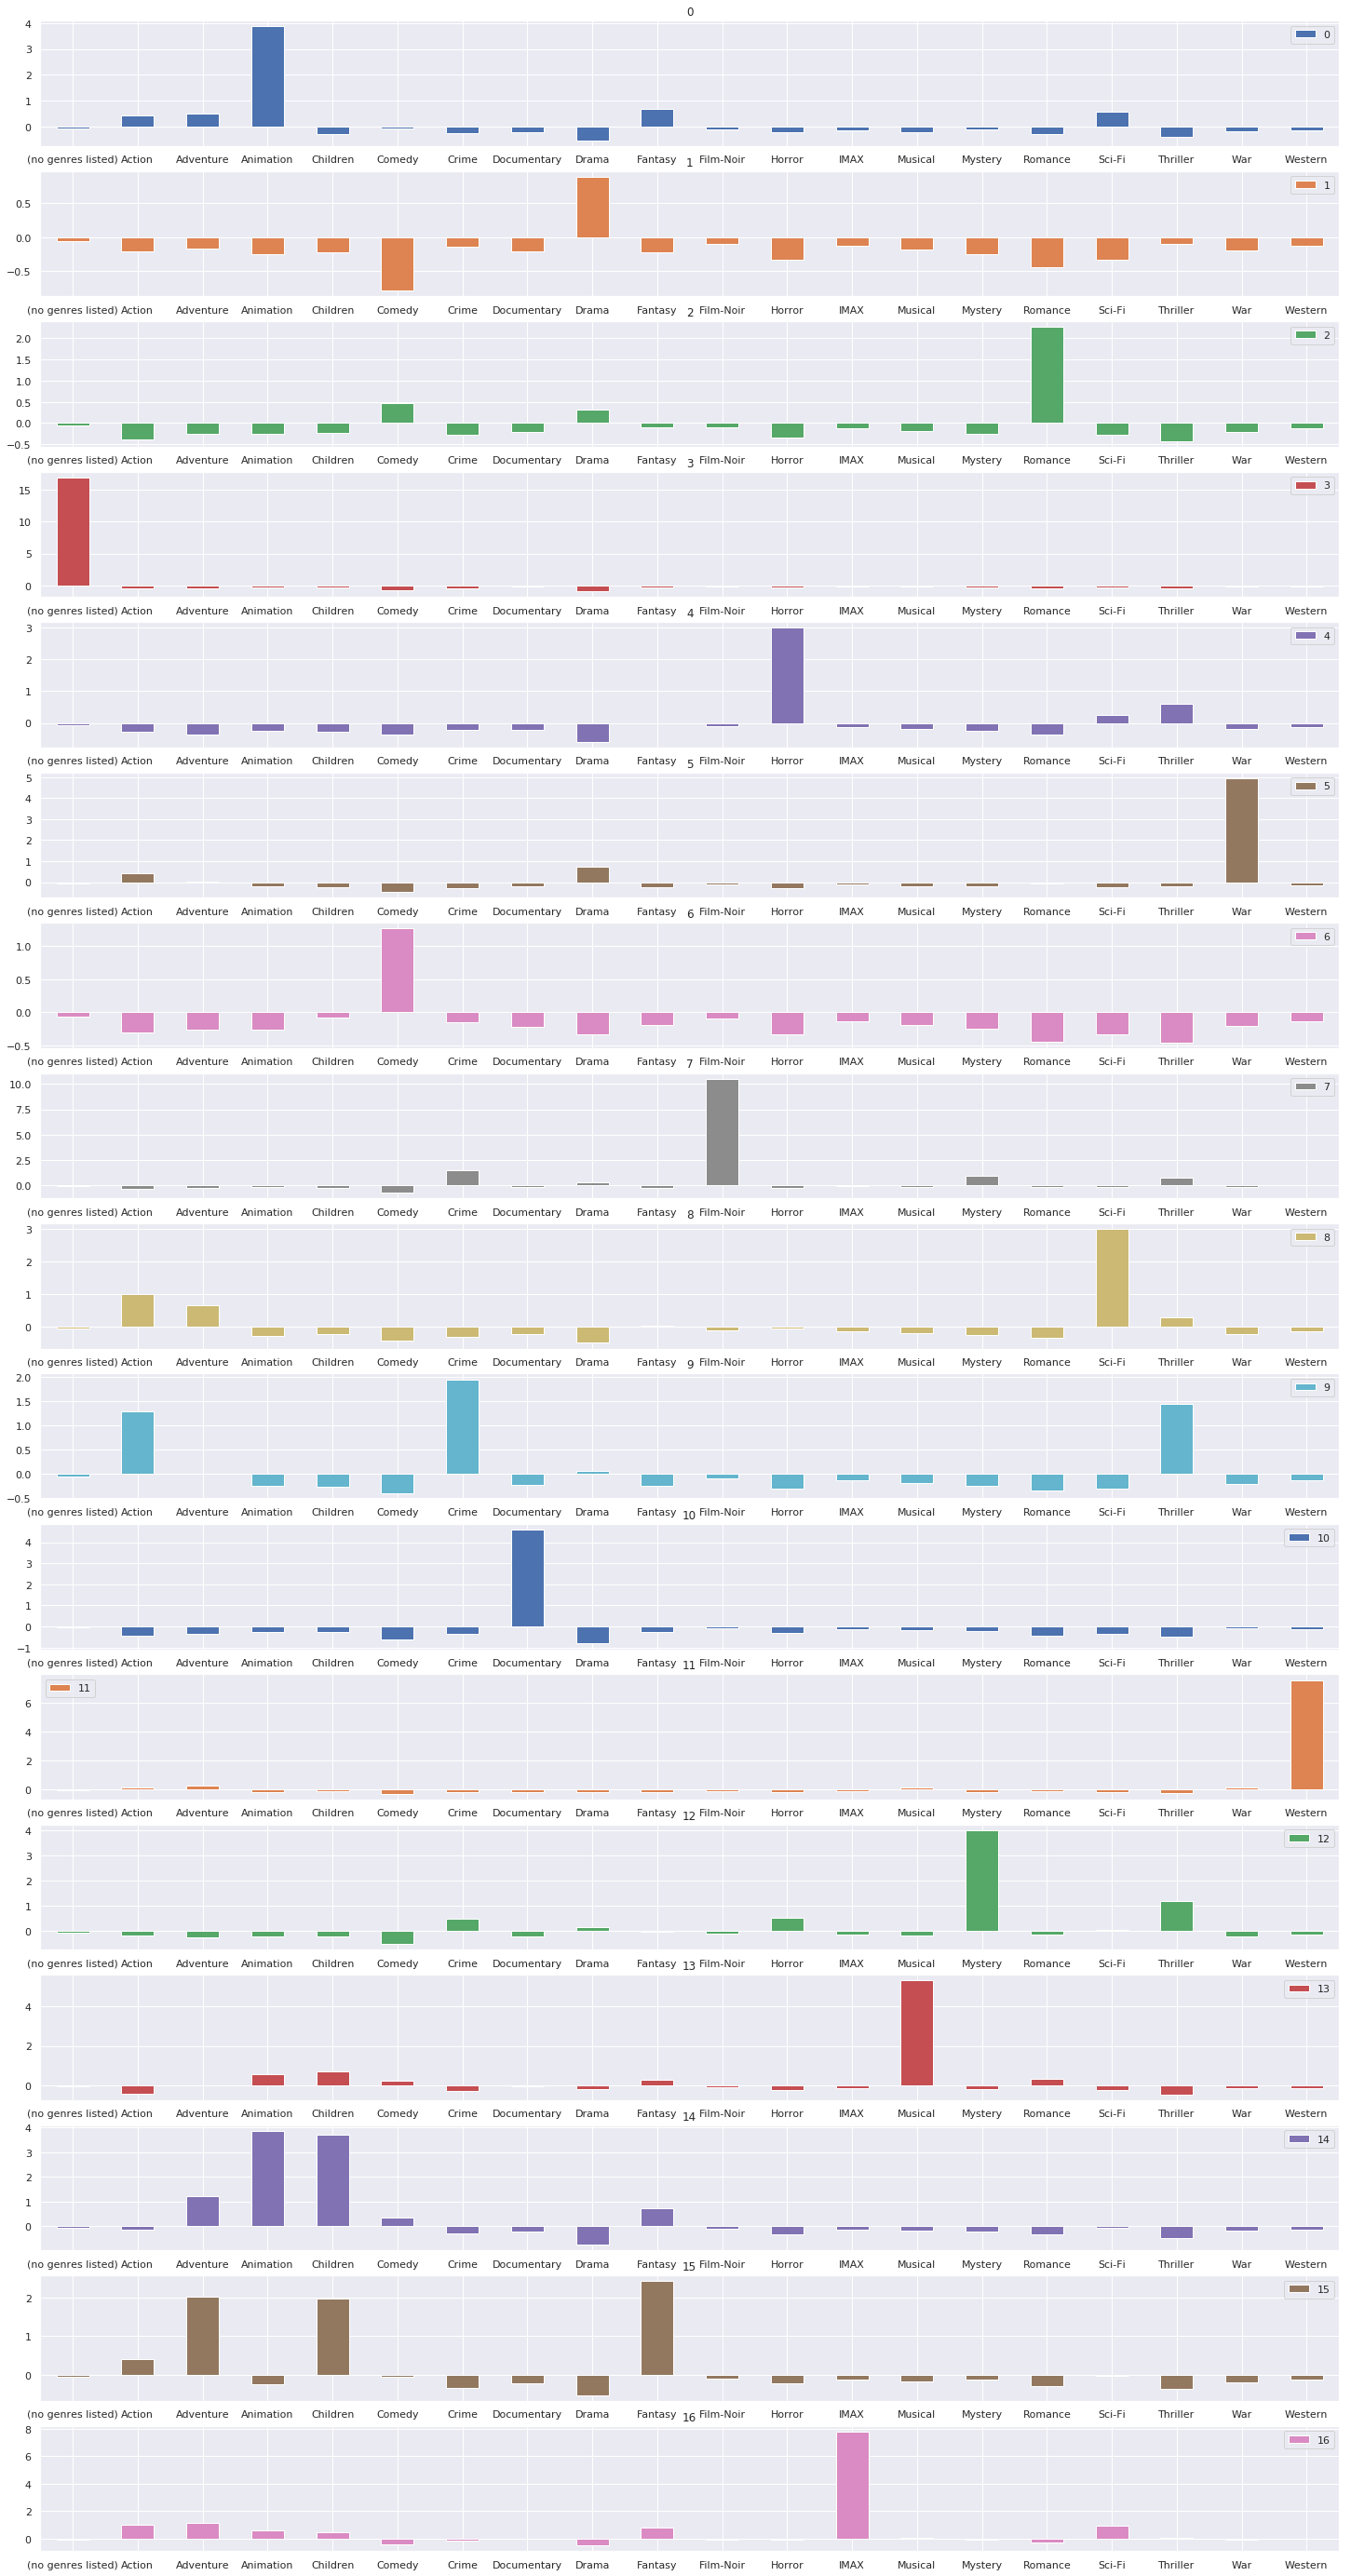

In [24]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [25]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3831,5377,About a Boy (2002),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
106,122,Boomerang (1992),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1953,2589,Friends & Lovers (1999),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
330,372,Reality Bites (1994),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7522,84374,No Strings Attached (2011),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9715,188751,Mamma Mia: Here We Go Again! (2018),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5279,8712,My Favorite Wife (1940),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1604,2146,St. Elmo's Fire (1985),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8553,115828,Copenhagen (2014),Adventure|Drama|Romance,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7349,78264,"Back-up Plan, The (2010)",Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [27]:
kmeans(20, generos_escalados)

[20, 54048.645318152245]

In [28]:
kmeans(3, generos_escalados)

[3, 167072.98577836071]

In [29]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.00000000003],
 [2, 179484.10704007462],
 [3, 167813.50269352456],
 [4, 157313.05327407332],
 [5, 148133.04135327545],
 [6, 137767.39735837962],
 [7, 128732.61542164591],
 [8, 120666.94219676398],
 [9, 110338.33261978501],
 [10, 104360.48835621946],
 [11, 95056.60776229032],
 [12, 88178.1028617163],
 [13, 80300.98011413892],
 [14, 71833.7536099022],
 [15, 67324.7730130603],
 [16, 63109.290384829554],
 [17, 60331.61059674022],
 [18, 58128.32336921667],
 [19, 57480.978029256476],
 [20, 55981.03908941075],
 [21, 54312.69886079437],
 [22, 51159.853697578714],
 [23, 50493.92213042655],
 [24, 49252.22894735446],
 [25, 47951.72660273196],
 [26, 46449.631005193274],
 [27, 46529.310188765914],
 [28, 45239.63442646672],
 [29, 44319.98521486216],
 [30, 42653.664132182326],
 [31, 42082.312698128844],
 [32, 41141.99437282618],
 [33, 40438.32019742273],
 [34, 39501.90878314755],
 [35, 38992.51604198646],
 [36, 38297.22546864835],
 [37, 37163.70941930967],
 [38, 36614.81537067361],
 [39, 3

In [30]:
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179484.107040
2,3,167813.502694
3,4,157313.053274
4,5,148133.041353
5,6,137767.397358
6,7,128732.615422
7,8,120666.942197
8,9,110338.332620
9,10,104360.488356


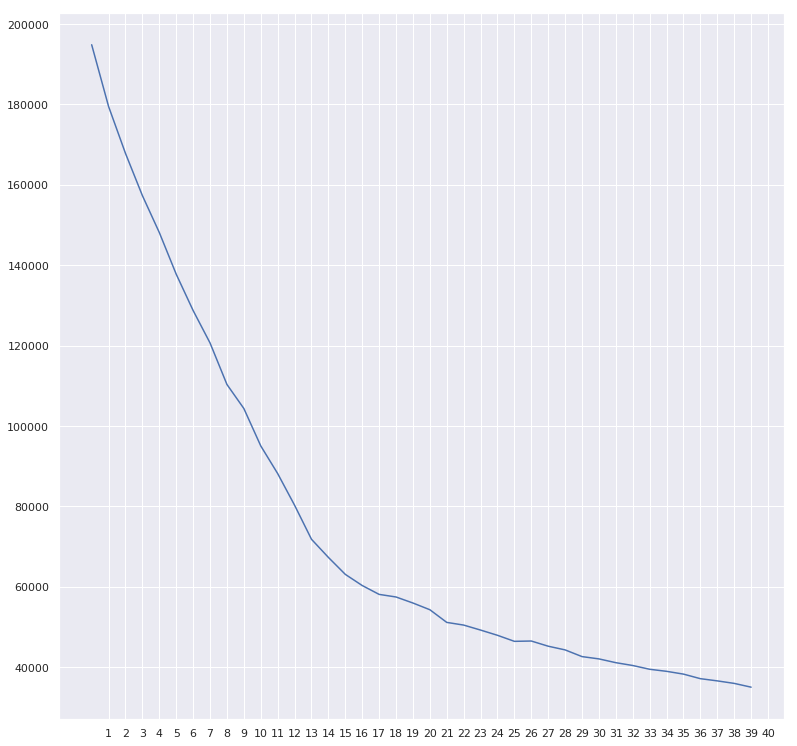

In [31]:
resultado.inertia.plot(xticks=resultado.grupos)

In [32]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x9c49bc4c>,
      dtype=object)

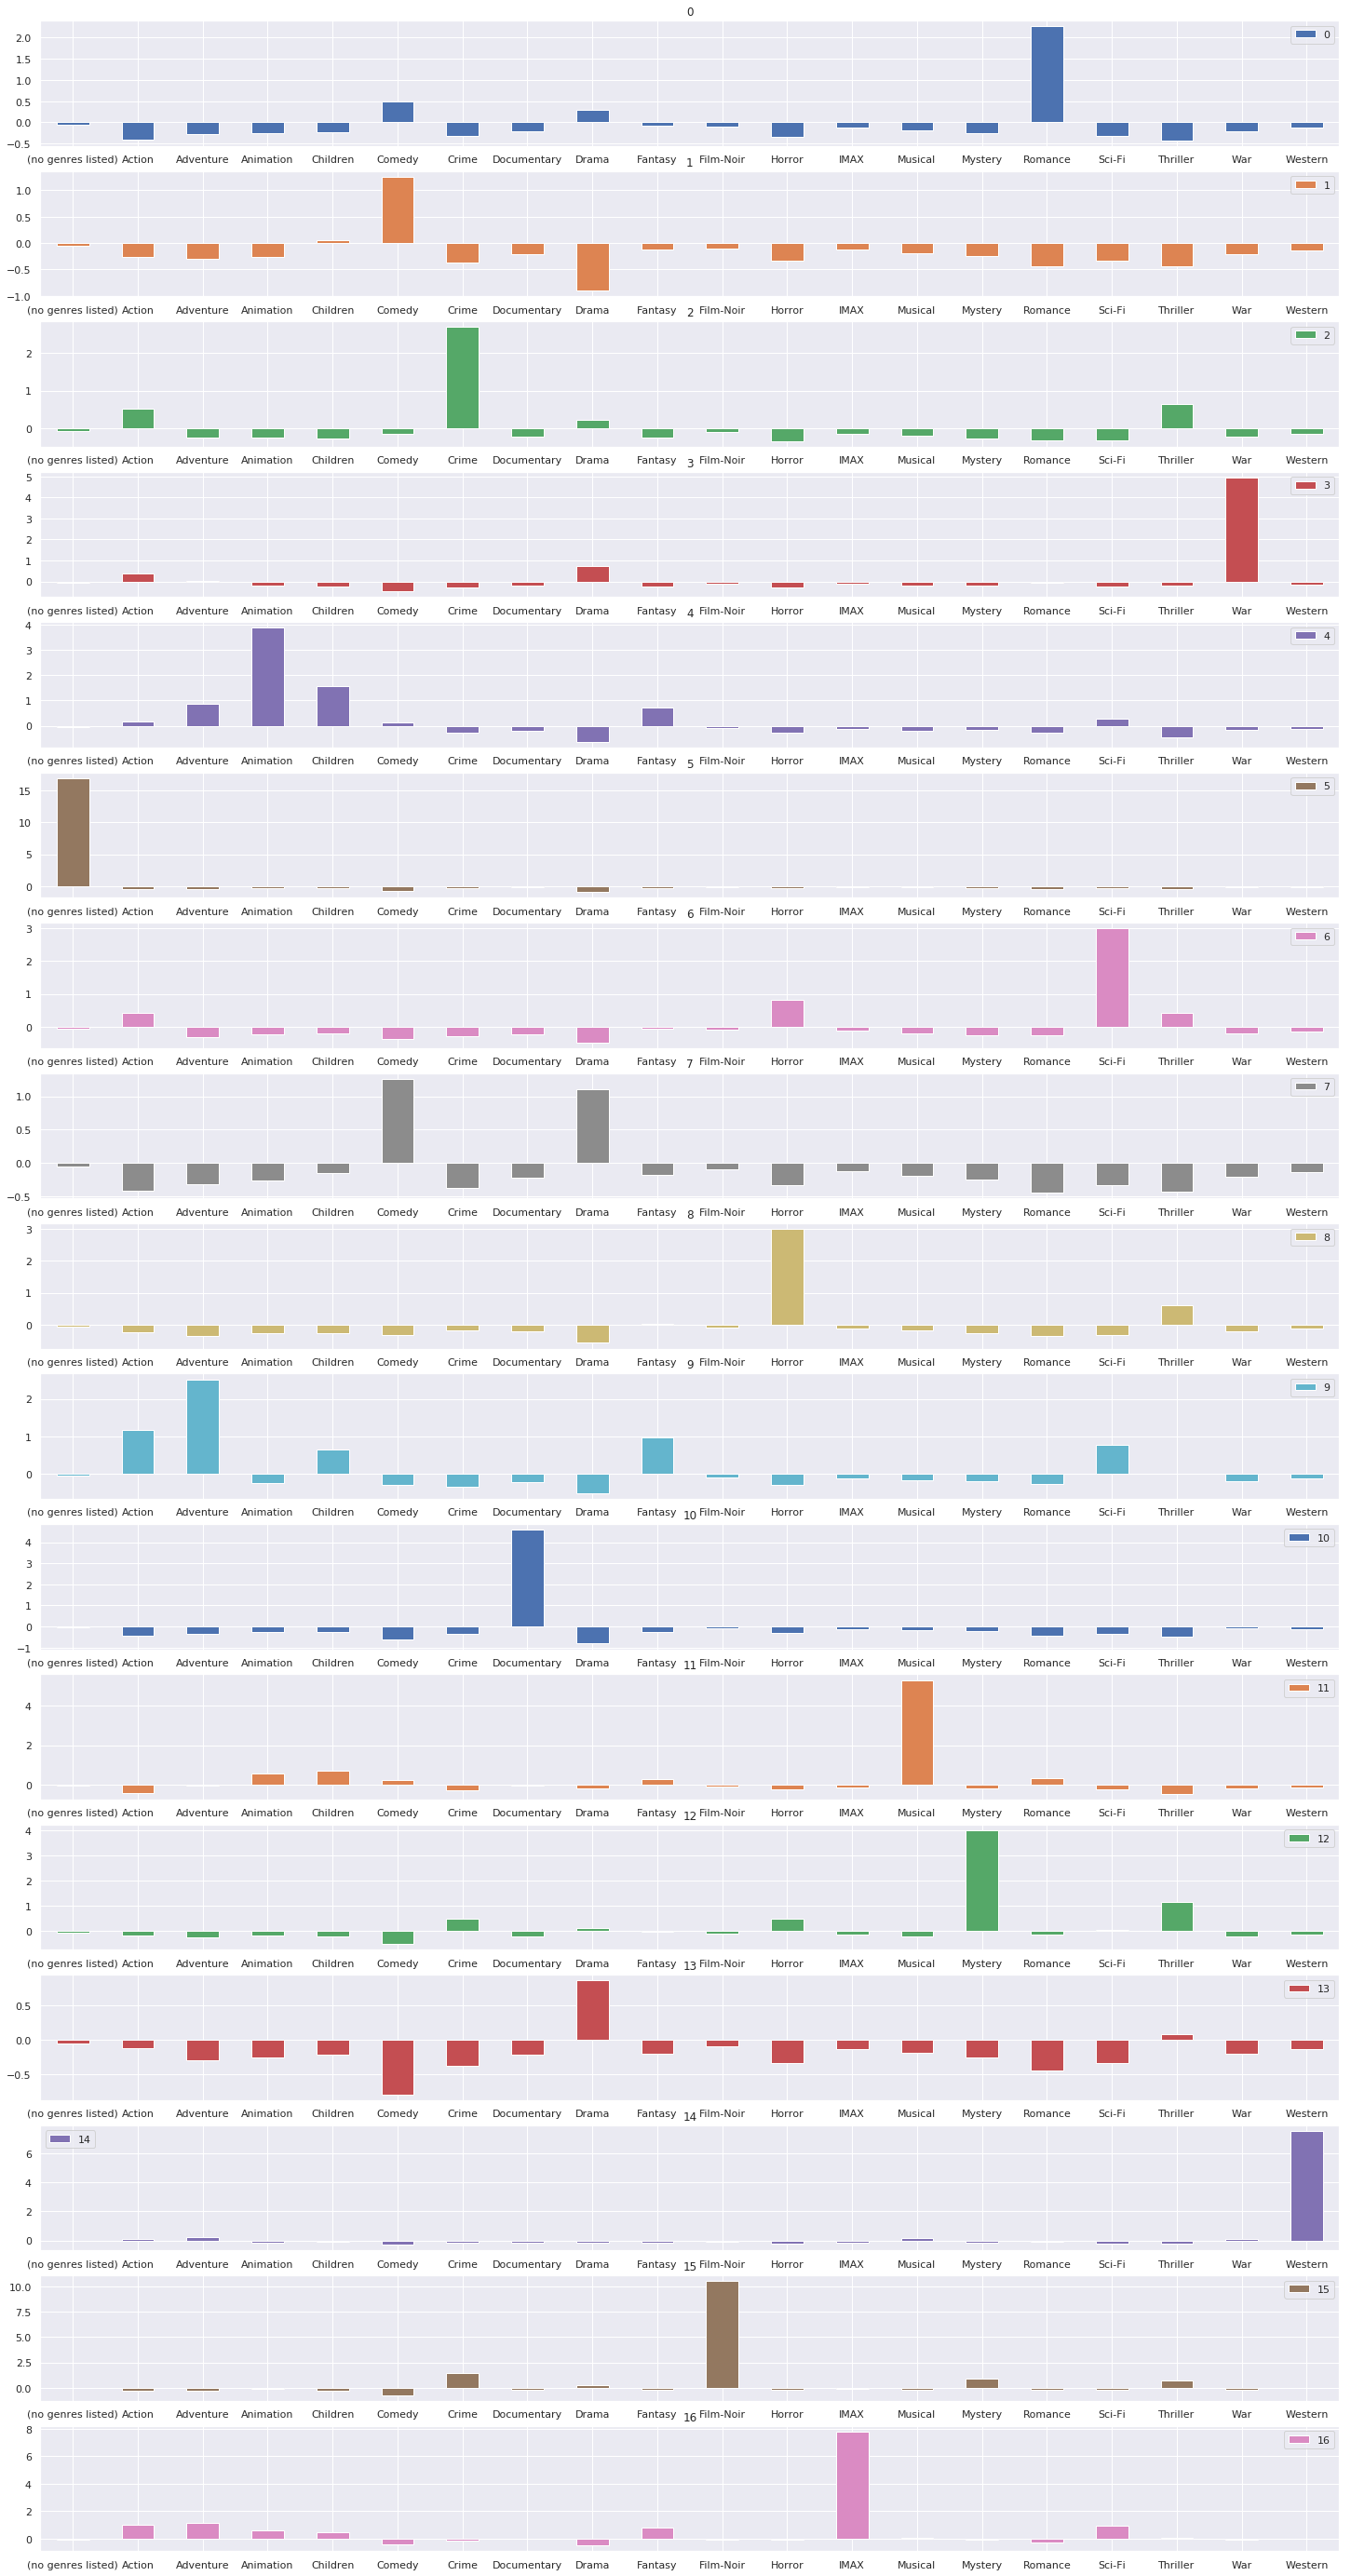

In [33]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

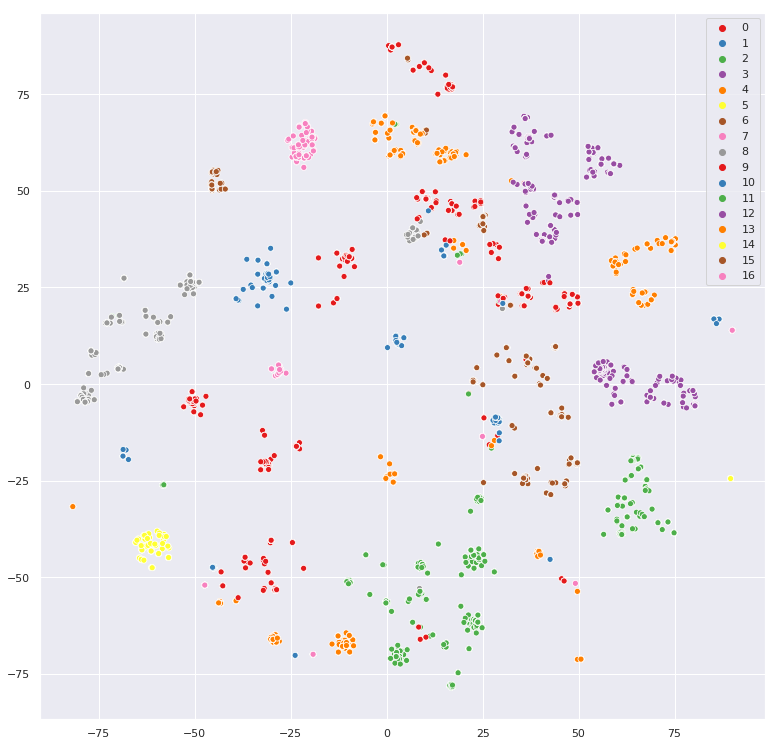

In [34]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})

sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 17))